## **TASK 5 : To Explore Business Analytics**

**Objective :** Perform ‘Exploratory Data Analysis’ on the provided dataset
‘SampleSuperstore’ and try to find out the weak areas where you can work
to make more profit. 

In [1]:
## Importing any initial recommended libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sample_super_store = pd.read_csv('SampleSuperstore.csv')
sample_super_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Check shape
sample_super_store.shape

(9994, 13)

In [4]:
sample_super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#Check Missing Values
print ("\nMissing values :  ", sample_super_store.isnull().sum().values.sum())


Missing values :   0


**There are no missing values in the dataset**

## Check duplicates rows and drop them

In [6]:
# Check Duplicate Values
sample_super_store.duplicated().sum()

17

In [7]:
# Drop duplicate values
sample_super_store=sample_super_store.drop_duplicates()
sample_super_store

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [8]:
# Find unique values
sample_super_store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
sample_super_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


**from the data we can see that the dataset is only for united states so it provide not much information and the postal code or the city provide us the same information so we can drop one of them**

In [10]:
sample_super_store = sample_super_store.drop(['Country'],axis=1)
sample_super_store = sample_super_store.drop(['Postal Code'],axis=1)
sample_super_store

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Descriptive Statistics

In [11]:
sample_super_store.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [12]:
sample_super_store.describe(include='object')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977
unique,4,3,531,49,4,3,17
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders
freq,5955,5183,914,1996,3193,6012,1522


In [13]:
# Analysing the correlations among variables
corrl = sample_super_store.corr()
corrl

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


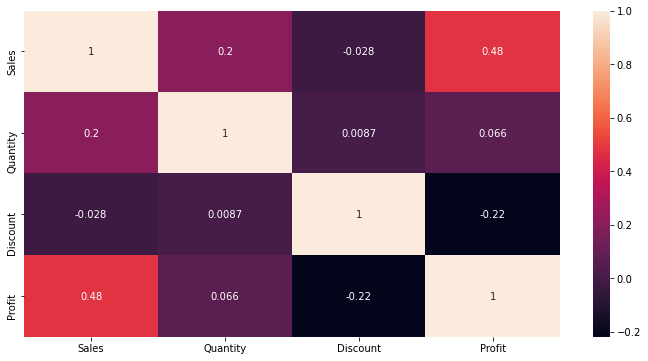

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(corrl, annot = True)
plt.show()

In [15]:
sample_super_store['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [16]:
sample_super_store['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## Data Visualization
Exploring the distribution of the 'sub-category' pertaining to 'category

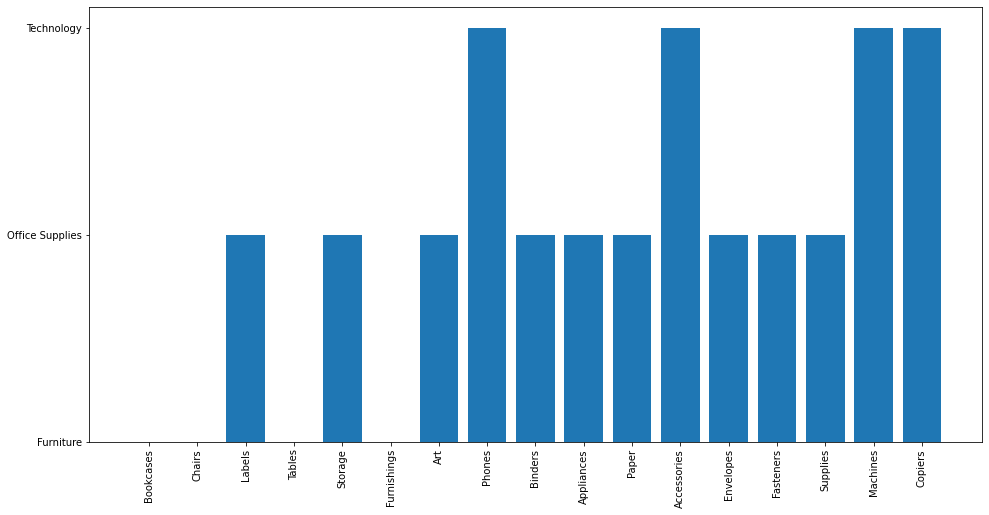

In [17]:
#Plot bar chart 
plt.figure(figsize=(16,8))
plt.bar('Sub-Category', 'Category', data=sample_super_store)
plt.xticks(rotation=90)
plt.show()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


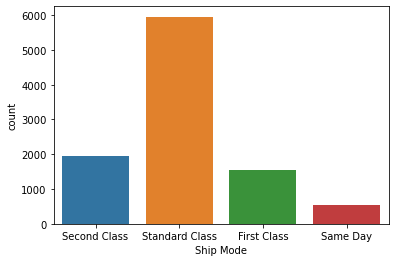

In [18]:
# Frequency Plot
print(sample_super_store["Ship Mode"].value_counts())
sns.countplot(x='Ship Mode',data=sample_super_store)

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


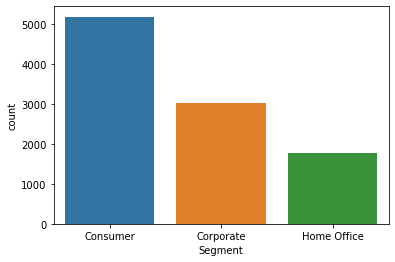

In [19]:
print(sample_super_store['Segment'].value_counts())
sns.countplot(x='Segment',data=sample_super_store)

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Danbury            1
Hagerstown         1
Rock Hill          1
Davis              1
Vacaville          1
Name: City, Length: 531, dtype: int64


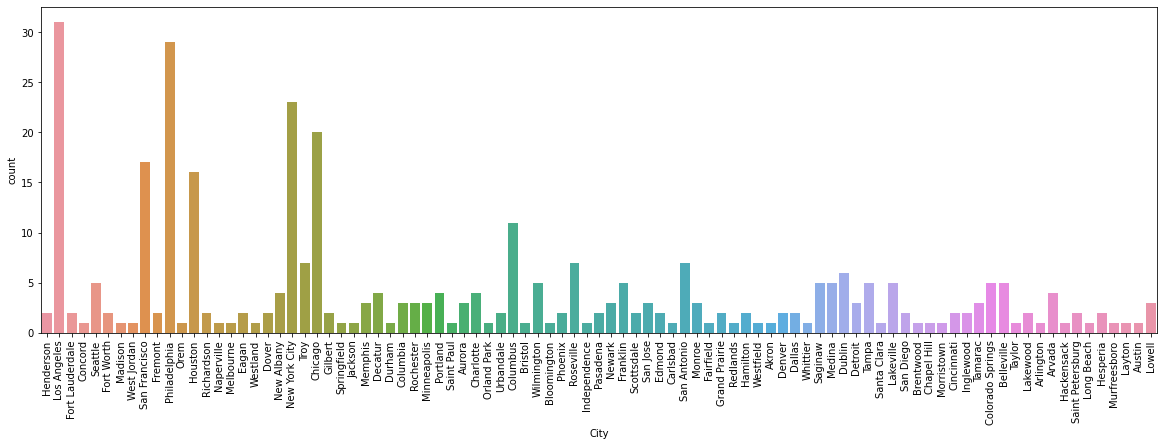

In [20]:
print(sample_super_store['City'].value_counts())
plt.figure(figsize=(20,6))
sns.countplot(x='City',data=sample_super_store.head(350))
plt.xticks(rotation=90)
plt.show()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

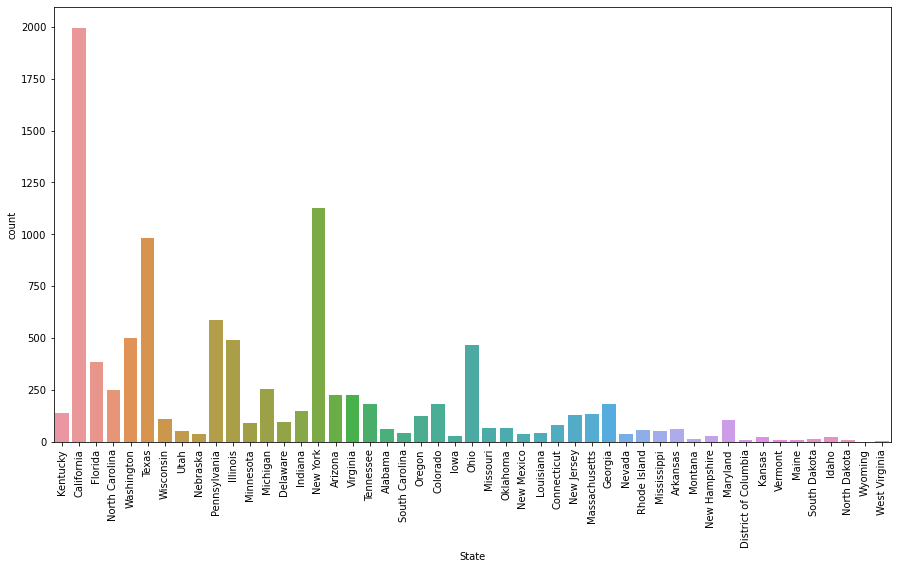

In [21]:
print (sample_super_store['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=sample_super_store['State'])
plt.xticks(rotation=90)
plt.show()

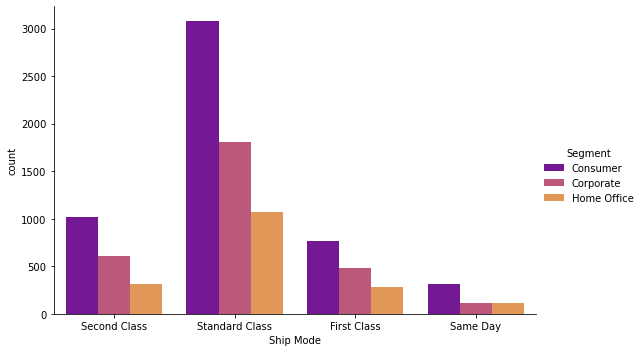

In [22]:
sns.catplot("Ship Mode",data=sample_super_store,hue="Segment",kind="count",palette="plasma",aspect=1.5,height=5)

In [23]:
storegroup=sample_super_store.groupby("Segment")["Quantity"].sum().reset_index()
storegroup

,Segment,Quantity
0,Consumer,19497
1,Corporate,11591
2,Home Office,6732


([<matplotlib.patches.Wedge at 0x1ecbd5814f0>,
 [Text(-0.05848912063586896, 1.1985737452352454, 'Consumer'),
  Text(-0.5862803792846226, -1.047031669466535, 'Corporate'),
  Text(0.9324437297536856, -0.5835654983316233, 'Home Office')])

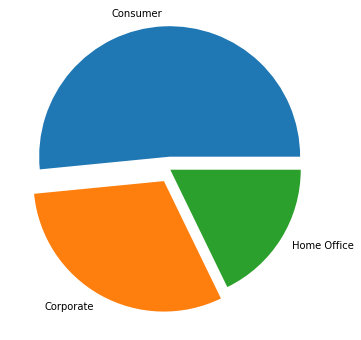

In [24]:
labels=sample_super_store['Segment'].unique()
plt.figure(figsize=(8,6))
plt.pie(storegroup['Quantity'],labels=labels,explode=(0.1,0.1,0))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

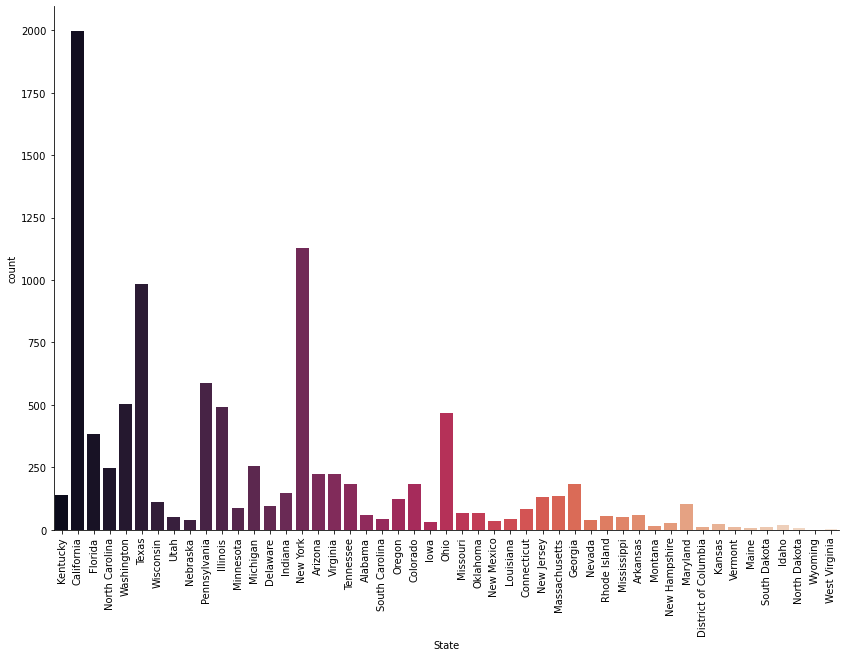

In [25]:
sns.catplot("State",kind='count',data=sample_super_store,palette='rocket',height=8,aspect=1.5)
plt.xticks(rotation=90)

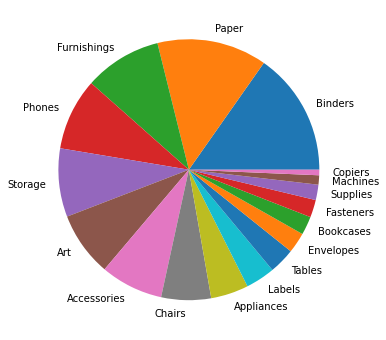

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


In [26]:
plt.figure(figsize=(12,6))
plt.pie(sample_super_store['Sub-Category'].value_counts(),labels=sample_super_store['Sub-Category'].value_counts().index)
plt.show()
print(sample_super_store['Sub-Category'].value_counts())

## Analysis for Profits

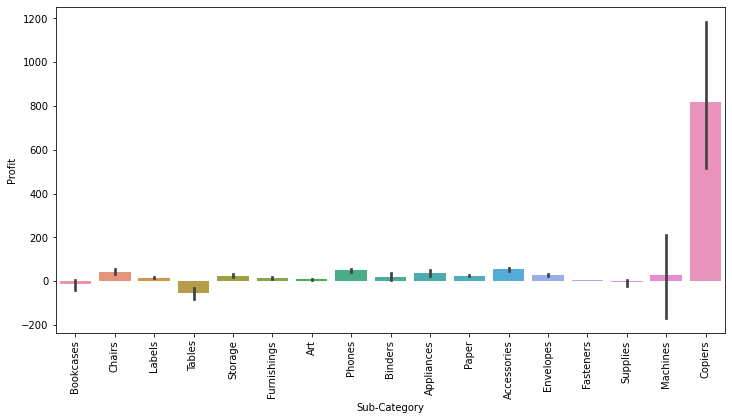

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='Sub-Category',y='Profit',data=sample_super_store)
plt.xticks(rotation=90)
plt.show()

**We have to look at the Furniture and technology sales**

**All sub categories but copiers are weak in profit making and should be imroved**

**Supplies to the south region should be improved**

**Number of people working as copiers should be increased for more products and sales and hence profiitable.**

**tables sales operation should be reduced**